# Contornos de Rice
#### Marce Melgar - 20200487

In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('rice.png')

assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)

filtered_image = cv.medianBlur(imgray, 5)

ret, imgbin = cv.threshold(filtered_image, 120, 255, cv.THRESH_BINARY)

(256, 256)


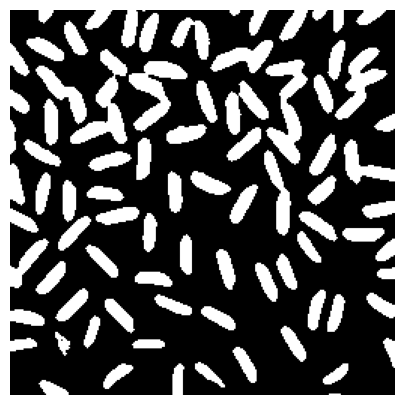

In [29]:
def view(img):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)   
    plt.axis('off')
    plt.show()
view(imgbin)

# cuantos granos de arroz hay?

In [43]:
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

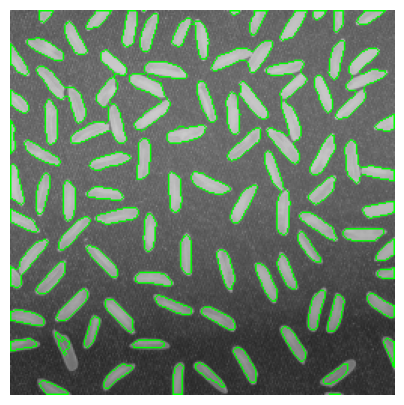

In [44]:
index = -1
color = (0,255,0) #(r,g,b)
thickness = 1
imgcont = cv.drawContours(im.copy(), contours, index, color, thickness)
view(imgcont)


In [45]:
min_area = 1

rice_count = 0

for contour in contours:
    area = cv.contourArea(contour)
    if area > min_area:
        rice_count += 1

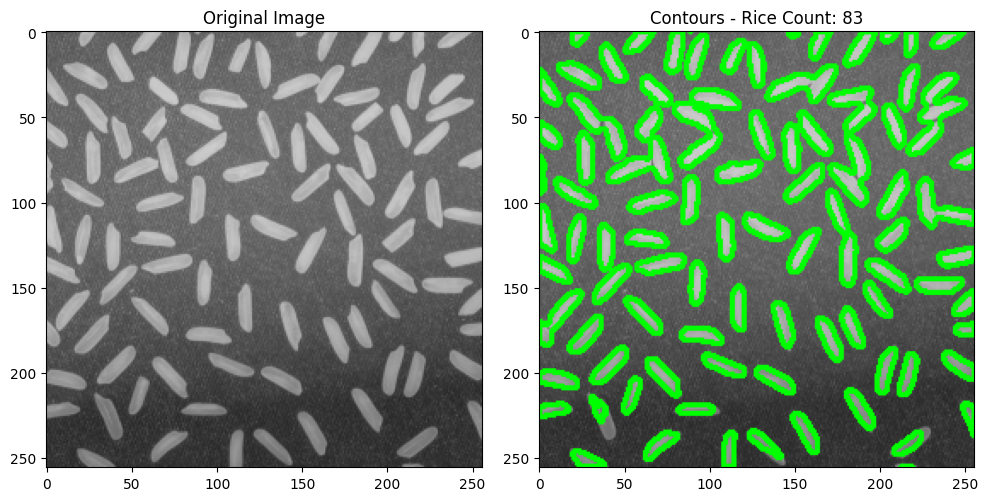

Total Rice Count: 83


In [46]:
# Draw the contours on a copy of the original image
contour_image = im.copy()
cv.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the original and contour images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(contour_image, cv.COLOR_BGR2RGB))
plt.title(f"Contours - Rice Count: {rice_count}")

plt.tight_layout()
plt.show()

print(f"Total Rice Count: {rice_count}")


# cuales son los granos mas similares?

In [52]:
# Calculate Hu moments for each contour
hu_moments_list = []

for contour in contours:
    moments = cv.moments(contour)
    hu_moments = cv.HuMoments(moments).flatten()
    hu_moments_list.append(hu_moments)

In [53]:
similarities = []

for i in range(len(hu_moments_list)):
    for j in range(i + 1, len(hu_moments_list)):
        similarity = cv.matchShapes(hu_moments_list[i], hu_moments_list[j], cv.CONTOURS_MATCH_I1, 0.0)
        similarities.append((i, j, similarity))

In [54]:

similarities.sort(key=lambda x: x[2])

most_similar_indices = similarities[0][:2]

print("Indices of the two most similar rice grains:", most_similar_indices)

Indices of the two most similar rice grains: (0, 81)


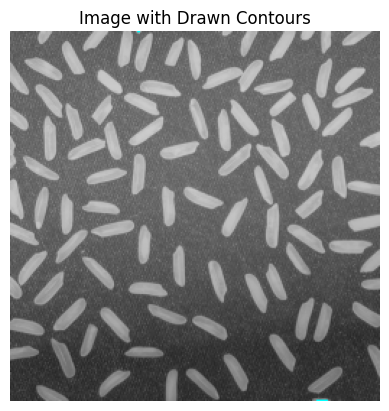

In [60]:
# Draw contours of the two most similar rice grains on a black canvas
canvas = np.zeros_like(imgray)
cv.drawContours(canvas, contours, most_similar_indices[0], (255, 255, 255), -1)
cv.drawContours(canvas, contours, most_similar_indices[1], (255, 255, 255), -1)

# Overlay the contours on the original image using Matplotlib
image_with_contours = cv.cvtColor(im, cv.COLOR_BGR2RGB)
image_with_contours[canvas > 0] = [0, 255, 255]  # Set contour regions to green

# Display the image with the drawn contours using Matplotlib
plt.imshow(image_with_contours)
plt.title("Image with Drawn Contours")
plt.axis('off')
plt.show()

# cual es la orientacion de cada arroz?

In [49]:
orientations = []

for contour in contours:
    # Calculate the moments of the contour
    moments = cv.moments(contour)
    
    # Calculate the orientation using the moments
    epsilon = 1e-6  # Small epsilon value to avoid division by zero
    denominator = moments['mu20'] - moments['mu02']
    if abs(denominator) > epsilon:
        orientation = 0.5 * np.arctan(2 * moments['mu11'] / denominator)
        orientations.append(orientation)
    else:
        orientations.append(0.0)  # Set orientation to 0 if denominator is close to zero


In [51]:
# Convert radians to degrees
orientations_deg = np.degrees(orientations)

# Display the orientations
for i, orientation in enumerate(orientations_deg):
    print(f"Rice Grain {i + 1}: Orientation = {orientation:.2f} degrees")


Rice Grain 1: Orientation = 0.00 degrees
Rice Grain 2: Orientation = 19.66 degrees
Rice Grain 3: Orientation = -35.85 degrees
Rice Grain 4: Orientation = 3.89 degrees
Rice Grain 5: Orientation = -38.21 degrees
Rice Grain 6: Orientation = 37.98 degrees
Rice Grain 7: Orientation = -29.04 degrees
Rice Grain 8: Orientation = -0.68 degrees
Rice Grain 9: Orientation = -14.17 degrees
Rice Grain 10: Orientation = -8.20 degrees
Rice Grain 11: Orientation = -25.68 degrees
Rice Grain 12: Orientation = 0.00 degrees
Rice Grain 13: Orientation = -32.12 degrees
Rice Grain 14: Orientation = 18.94 degrees
Rice Grain 15: Orientation = 12.06 degrees
Rice Grain 16: Orientation = 29.25 degrees
Rice Grain 17: Orientation = -42.03 degrees
Rice Grain 18: Orientation = 14.42 degrees
Rice Grain 19: Orientation = 21.97 degrees
Rice Grain 20: Orientation = 35.38 degrees
Rice Grain 21: Orientation = 14.91 degrees
Rice Grain 22: Orientation = 44.55 degrees
Rice Grain 23: Orientation = 7.15 degrees
Rice Grain 24: Or